In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
demand = [
    {'value': 'Economic', 'entity': 'Open AI', 'demand': 82},
    {'value': 'Economic', 'entity': 'Google', 'demand': 76},
    {'value': 'Economic', 'entity': 'Microsoft', 'demand': 83},
    {'value': 'Economic', 'entity': 'Meta', 'demand': 67},
    {'value': 'Economic', 'entity': 'IBM', 'demand': 70},
    {'value': 'Functional', 'entity': 'Open AI', 'demand': 85},
    {'value': 'Functional', 'entity': 'Google', 'demand': 80},
    {'value': 'Functional', 'entity': 'Microsoft', 'demand': 85},
    {'value': 'Functional', 'entity': 'Meta', 'demand': 71},
    {'value': 'Functional', 'entity': 'IBM', 'demand': 73},
    {'value': 'Emotional', 'entity': 'Open AI', 'demand': 82},
    {'value': 'Emotional', 'entity': 'Google', 'demand': 72},
    {'value': 'Emotional', 'entity': 'Microsoft', 'demand': 78},
    {'value': 'Emotional', 'entity': 'Meta', 'demand': 64},
    {'value': 'Emotional', 'entity': 'IBM', 'demand': 68},
    {'value': 'Social', 'entity': 'Open AI', 'demand': 81},
    {'value': 'Social', 'entity': 'Google', 'demand': 73},
    {'value': 'Social', 'entity': 'Microsoft', 'demand': 79},
    {'value': 'Social', 'entity': 'IBM', 'demand': 67},
    {'value': 'Social', 'entity': 'Meta', 'demand': 65},
    {'value': 'Societal', 'entity': 'Open AI', 'demand': 80},
    {'value': 'Societal', 'entity': 'Google', 'demand': 71},
    {'value': 'Societal', 'entity': 'Microsoft', 'demand': 78},
    {'value': 'Societal', 'entity': 'Meta', 'demand': 64},
    {'value': 'Societal', 'entity': 'IBM', 'demand': 72}
]

perception = [
    {'value': 'Economic', 'entity': 'Open AI', 'perception': 79},
    {'value': 'Economic', 'entity': 'Google', 'perception': 74},
    {'value': 'Economic', 'entity': 'Microsoft', 'perception': 81},
    {'value': 'Economic', 'entity': 'Meta', 'perception': 65},
    {'value': 'Economic', 'entity': 'IBM', 'perception': 71},
    {'value': 'Functional', 'entity': 'Open AI', 'perception': 83},
    {'value': 'Functional', 'entity': 'Google', 'perception': 80},
    {'value': 'Functional', 'entity': 'Microsoft', 'perception': 84},
    {'value': 'Functional', 'entity': 'Meta', 'perception': 70},
    {'value': 'Functional', 'entity': 'IBM', 'perception': 74},
    {'value': 'Emotional', 'entity': 'Open AI', 'perception': 80},
    {'value': 'Emotional', 'entity': 'Google', 'perception': 71},
    {'value': 'Emotional', 'entity': 'Microsoft', 'perception': 78},
    {'value': 'Emotional', 'entity': 'Meta', 'perception': 63},
    {'value': 'Emotional', 'entity': 'IBM', 'perception': 69},
    {'value': 'Social', 'entity': 'Open AI', 'perception': 79},
    {'value': 'Social', 'entity': 'Google', 'perception': 72},
    {'value': 'Social', 'entity': 'Microsoft', 'perception': 78},
    {'value': 'Social', 'entity': 'IBM', 'perception': 67},
    {'value': 'Social', 'entity': 'Meta', 'perception': 63},
    {'value': 'Societal', 'entity': 'Open AI', 'perception': 77},
    {'value': 'Societal', 'entity': 'Google', 'perception': 69},
    {'value': 'Societal', 'entity': 'Microsoft', 'perception': 76},
    {'value': 'Societal', 'entity': 'Meta', 'perception': 61},
    {'value': 'Societal', 'entity': 'IBM', 'perception': 73}
]

In [3]:
def compute_composite_score_matrix(demand_data, perception_data, wP=0.5, wD=0.5):
    """
    Calculates composite scores and returns a pivot table with:
    - Values as rows
    - Entities as columns
    - Composite scores in the cells
    """
    # Define the desired order of dimensions
    value_order = ["Economic", "Functional", "Emotional", "Social", "Societal"]
    entity_order = ["Google", "Open AI", "Meta", "Microsoft", "IBM"]
    
    # Convert to DataFrames
    demand_df = pd.DataFrame(demand_data)
    perception_df = pd.DataFrame(perception_data)
    
    # Merge the dataframes on entity and value
    merged_df = pd.merge(
        demand_df, 
        perception_df, 
        on=['entity', 'value']
    )
    
    # Calculate composite score
    merged_df['composite_score'] = (
        wP * merged_df['perception'] +  wD * merged_df['demand']
    )
    
    # Create pivot table with specified order
    matrix_df = merged_df.pivot(
        index='value',
        columns='entity',
        values='composite_score'
    )
    
    # Reorder the index and columns
    matrix_df = matrix_df.reindex(index=value_order, columns=entity_order)
    
    return matrix_df

In [4]:
matrix_df = compute_composite_score_matrix(demand, perception, wP=0.5, wD=0.5)
matrix_df

entity,Google,Open AI,Meta,Microsoft,IBM
value,,,,,
Economic,75.0,80.5,66.0,82.0,70.5
Functional,80.0,84.0,70.5,84.5,73.5
Emotional,71.5,81.0,63.5,78.0,68.5
Social,72.5,80.0,64.0,78.5,67.0
Societal,70.0,78.5,62.5,77.0,72.5


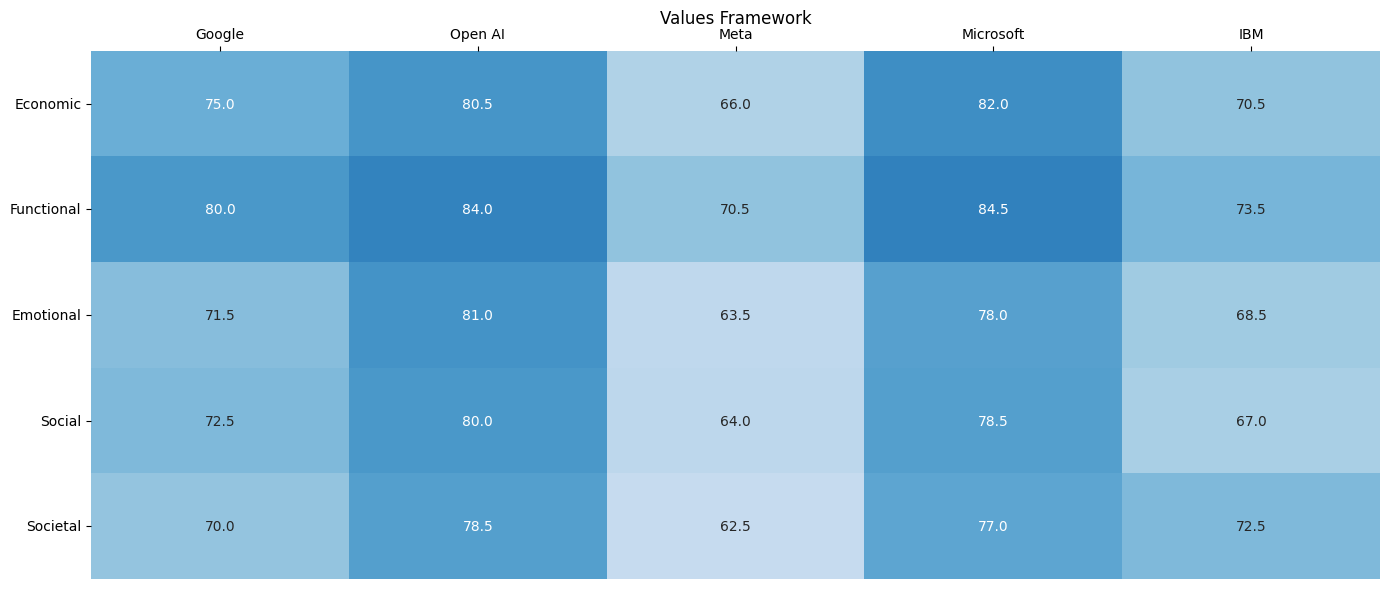

In [5]:
def plot_heatmap(matrix_df, figsize=(14, 6)):
    plt.figure(figsize=figsize)

    sns.heatmap(
        matrix_df,
        annot=True,          
        fmt='.1f',       
        cmap='Blues',#'Greens',    
        center=75,          
        vmin=50,           
        vmax=100,          
        cbar=False,      
        square=False     
    )
    
    # Customize the plot
    plt.title('Values Framework', pad=20)
    
    # Move x-axis labels to top and remove axis labels
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label
    
    # Make labels horizontal
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt

matrix = compute_composite_score_matrix(demand, perception)
plot_heatmap(matrix)
plt.show()